## Lab 4 – Prediktiv Modell för Smart Home IoT
# Machine Learning med enklaste möjliga kod

**Företag**: Smart Home Energy AB  
**Mål**: Förutsäga energiförbrukning baserat på andra sensorer

## Varför prediktiv modell?
- Förutsäga framtida energibehov
- Optimera energianvändning
- Upptäcka avvikelser (defekta apparater)

## Vad vi ska göra:
1. **Förbered data** - Välj relevanta kolumner
2. **Bygg modell** - Enkel Linear Regression
3. **Träna modell** - Lär modellen från historisk data
4. **Utvärdera** - Hur bra är modellen?
5. **Testa** - Gör prediktioner

In [ ]:
# STEG 0: Installera sklearn (scikit-learn)
# Kör denna cell FÖRST!
%pip install scikit-learn

print("✅ scikit-learn installerad!")

In [ ]:
# STEG 1: Importera bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# För machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

print(" Bibliotek importerade!")
print("Vi använder sklearn - världens enklaste ML-bibliotek")

✅ Bibliotek importerade!
Vi använder sklearn - världens enklaste ML-bibliotek


In [2]:
# STEG 2: Läs in ren data
data = pd.read_csv("../data/cleaned_iot_data.csv")

print(" DATA LADDAD")
print("=" * 60)
print(f"Antal rader: {len(data):,}")
print(f"Antal kolumner: {len(data.columns)}")
print(f"\nFörsta 3 rader:")
print(data.head(3))

 DATA LADDAD
Antal rader: 18,537
Antal kolumner: 29

Första 3 rader:
             Datum_Tid  Vitvaror_Energi_Wh  Belysning_Wh  Temp_Kök_C  \
0  2016-01-11 17:00:00                60.0            30       19.89   
1  2016-01-11 17:10:00                60.0            30       19.89   
2  2016-01-11 17:20:00                50.0            30       19.89   

   Fukt_Kök_Procent  Temp_Vardagsrum_C  Fukt_Vardagsrum_Procent  \
0         47.596667               19.2                44.790000   
1         46.693333               19.2                44.722500   
2         46.300000               19.2                44.626667   

   Temp_Tvättstuga_C  Fukt_Tvättstuga_Procent  Temp_Kontor_C  ...  \
0              19.79                44.730000      19.000000  ...   
1              19.79                44.790000      19.000000  ...   
2              19.79                44.933333      18.926667  ...   

   Temp_Föräldrarum_C  Fukt_Föräldrarum_Procent  Temp_Utomhus_Väderstation_C  \
0           17.0

### STEG 3: Förbered data för machine learning

**Vad ska vi förutsäga?**  
→ `Vitvaror_Energi_Wh` (Y = target)

**Vad ska vi använda för att förutsäga?**  
→ Temperatur, fuktighet, belysning (X = features)

**Enkelt exempel:**
- Om kök är varmt → mer energi (kylskåp jobbar)
- Om belysning hög → mer energi (aktivitet)

In [3]:
# STEG 3: Välj features (X) och target (Y)

print(" VÄLJ DATA FÖR MODELLEN")
print("=" * 60)

# TARGET (vad vi vill förutsäga)
Y = data['Vitvaror_Energi_Wh']
print(f" Target (Y): Vitvaror_Energi_Wh")
print(f"   → Detta ska modellen lära sig förutsäga\n")

# FEATURES (vad vi använder för att förutsäga)
# Vi väljer enkla, logiska features
X = data[['Temp_Kök_C', 
          'Fukt_Kök_Procent',
          'Belysning_Wh',
          'Temp_Utomhus_Norr_C']]

print(f" Features (X): 4 kolumner")
print(f"   1. Temp_Kök_C - Temperatur i köket")
print(f"   2. Fukt_Kök_Procent - Fuktighet i köket") 
print(f"   3. Belysning_Wh - Belysning (indikerar aktivitet)")
print(f"   4. Temp_Utomhus_Norr_C - Väder påverkar kylskåp")

print(f"\n Data shape:")
print(f"   X: {X.shape} (rader, kolumner)")
print(f"   Y: {Y.shape} (rader)")

 VÄLJ DATA FÖR MODELLEN
 Target (Y): Vitvaror_Energi_Wh
   → Detta ska modellen lära sig förutsäga

 Features (X): 4 kolumner
   1. Temp_Kök_C - Temperatur i köket
   2. Fukt_Kök_Procent - Fuktighet i köket
   3. Belysning_Wh - Belysning (indikerar aktivitet)
   4. Temp_Utomhus_Norr_C - Väder påverkar kylskåp

 Data shape:
   X: (18537, 4) (rader, kolumner)
   Y: (18537,) (rader)


In [4]:
# STEG 4: Dela data i träning och test

print("\n DELA DATA: TRÄNING vs TEST")
print("=" * 60)

# 80% träning, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f" Data uppdelad:")
print(f"   Träningsdata: {len(X_train):,} rader (80%)")
print(f"   Testdata: {len(X_test):,} rader (20%)")

print(f"\n Varför dela?")
print(f"   • Träna modellen på 80%")
print(f"   • Testa på 20% (data modellen aldrig sett)")
print(f"   • Detta visar hur bra modellen fungerar på ny data")


 DELA DATA: TRÄNING vs TEST
 Data uppdelad:
   Träningsdata: 14,829 rader (80%)
   Testdata: 3,708 rader (20%)

 Varför dela?
   • Träna modellen på 80%
   • Testa på 20% (data modellen aldrig sett)
   • Detta visar hur bra modellen fungerar på ny data


### STEG 5: Bygg och träna modellen

**Linear Regression** = Enklaste ML-modellen!

Modellen lär sig:
```
Energi = a₁×Temp + a₂×Fukt + a₃×Belysning + a₄×Temp_ute + b
```

Där a₁, a₂, a₃, a₄, b är koefficienter som modellen hittar själv!

In [5]:
# STEG 5: Skapa och träna modellen

print("\n BYGG MODELLEN")
print("=" * 60)

# Skapa modellen (1 rad kod!)
modell = LinearRegression()
print(" Modell skapad: Linear Regression")

# Träna modellen (1 rad kod!)
print("\n⏳ Tränar modellen...")
modell.fit(X_train, Y_train)
print(" Träning klar!")

# Visa vad modellen lärde sig
print(f"\n VAD LÄRDE SIG MODELLEN?")
print(f"Modellen hittade dessa koefficienter:")
print(f"  Temp_Kök_C:          {modell.coef_[0]:>8.2f}")
print(f"  Fukt_Kök_Procent:    {modell.coef_[1]:>8.2f}")
print(f"  Belysning_Wh:        {modell.coef_[2]:>8.2f}")
print(f"  Temp_Utomhus_Norr_C: {modell.coef_[3]:>8.2f}")
print(f"  Intercept (b):       {modell.intercept_:>8.2f}")

print(f"\n Exempel: Om Temp_Kök ökar 1°C → energi ändras {modell.coef_[0]:.2f} Wh")


 BYGG MODELLEN
 Modell skapad: Linear Regression

⏳ Tränar modellen...
 Träning klar!

 VAD LÄRDE SIG MODELLEN?
Modellen hittade dessa koefficienter:
  Temp_Kök_C:              0.99
  Fukt_Kök_Procent:       -0.20
  Belysning_Wh:            1.49
  Temp_Utomhus_Norr_C:     1.46
  Intercept (b):          46.54

 Exempel: Om Temp_Kök ökar 1°C → energi ändras 0.99 Wh


In [6]:
# STEG 6: Testa modellen (gör prediktioner)

print("\n TESTA MODELLEN")
print("=" * 60)

# Gör prediktioner på testdata
Y_pred = modell.predict(X_test)

print(f" Modellen har gjort {len(Y_pred):,} prediktioner!")

# Visa några exempel
print(f"\n EXEMPEL PÅ PREDIKTIONER:")
print(f"{'Verklig energi':>20} | {'Predikterad energi':>20} | {'Skillnad':>10}")
print("-" * 60)

for i in range(5):
    verklig = Y_test.iloc[i]
    predikterad = Y_pred[i]
    skillnad = abs(verklig - predikterad)
    print(f"{verklig:>17.0f} Wh | {predikterad:>17.0f} Wh | {skillnad:>7.0f} Wh")


 TESTA MODELLEN
 Modellen har gjort 3,708 prediktioner!

 EXEMPEL PÅ PREDIKTIONER:
      Verklig energi |   Predikterad energi |   Skillnad
------------------------------------------------------------
               50 Wh |                68 Wh |      18 Wh
               50 Wh |                71 Wh |      21 Wh
              140 Wh |               115 Wh |      25 Wh
               50 Wh |                61 Wh |      11 Wh
               40 Wh |                63 Wh |      23 Wh


In [7]:
# STEG 7: Utvärdera modellen

print("\n HUR BRA ÄR MODELLEN?")
print("=" * 60)

# Beräkna felmarginaler
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"1️ MAE (Mean Absolute Error): {mae:.1f} Wh")
print(f"   → Genomsnittligt fel: {mae:.1f} Wh")
print(f"   → Modellen missar i snitt med {mae:.1f} Wh")

print(f"\n2️ R² Score: {r2:.3f}")
print(f"   → Hur bra modellen förklarar variationen")
if r2 > 0.7:
    print(f"   →  BRA! Modellen förklarar {r2*100:.1f}% av variationen")
elif r2 > 0.5:
    print(f"   →  OK. Modellen förklarar {r2*100:.1f}% av variationen")
else:
    print(f"   →  DÅLIG. Modellen förklarar bara {r2*100:.1f}%")

# Sätt i perspektiv
medel_energi = Y_test.mean()
print(f"\n PERSPEKTIV:")
print(f"   Genomsnittlig energi: {medel_energi:.0f} Wh")
print(f"   Felmarginal: {mae:.0f} Wh ({mae/medel_energi*100:.1f}% av medel)")


 HUR BRA ÄR MODELLEN?
1️ MAE (Mean Absolute Error): 30.1 Wh
   → Genomsnittligt fel: 30.1 Wh
   → Modellen missar i snitt med 30.1 Wh

2️ R² Score: 0.086
   → Hur bra modellen förklarar variationen
   →  DÅLIG. Modellen förklarar bara 8.6%

 PERSPEKTIV:
   Genomsnittlig energi: 76 Wh
   Felmarginal: 30 Wh (39.5% av medel)


In [ ]:
# Graf: Jämför båda modellerna

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gammal modell
ax1.scatter(Y_test, Y_pred, alpha=0.5, s=20, color='red')
ax1.plot([Y_test.min(), Y_test.max()], 
         [Y_test.min(), Y_test.max()], 
         'k--', linewidth=2, label='Perfekt')
ax1.set_xlabel('Verklig energi (Wh)')
ax1.set_ylabel('Predikterad energi (Wh)')
ax1.set_title(f'GAMMAL modell (temp/fukt)\nR² = {r2:.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ny modell
ax2.scatter(Y_test2, Y_pred2, alpha=0.5, s=20, color='green')
ax2.plot([Y_test2.min(), Y_test2.max()], 
         [Y_test2.min(), Y_test2.max()], 
         'k--', linewidth=2, label='Perfekt')
ax2.set_xlabel('Verklig energi (Wh)')
ax2.set_ylabel('Predikterad energi (Wh)')
ax2.set_title(f'NY modell (tid-baserad)\nR² = {r2_2:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n👀 SE SKILLNADEN:")
print("   Vänster (röd) = spridd (dålig)")
print("   Höger (grön) = närmare linjen (bättre)")

In [ ]:
# FÖRBÄTTRAD MODELL: Använd TID istället!

print("\n🔄 FÖRSÖK 2: BÄTTRE FEATURES")
print("=" * 60)

# Lägg till tidsbaserade features
data['Datum_Tid'] = pd.to_datetime(data['Datum_Tid'])
data['Timme'] = data['Datum_Tid'].dt.hour
data['Dag_i_vecka'] = data['Datum_Tid'].dt.dayofweek  # 0=måndag, 6=söndag
data['Är_helg'] = (data['Dag_i_vecka'] >= 5).astype(int)  # 1=helg, 0=vardag

# NYA features (tid-baserade!)
X_bättre = data[['Timme', 
                  'Dag_i_vecka',
                  'Är_helg',
                  'Belysning_Wh']]  # Behåll belysning (indikerar aktivitet)

Y_bättre = data['Vitvaror_Energi_Wh']

print("✅ NYA FEATURES:")
print("   1. Timme (0-23) - När på dygnet?")
print("   2. Dag_i_vecka (0-6) - Vilket dag?")
print("   3. Är_helg (0/1) - Helg eller vardag?")
print("   4. Belysning_Wh - Aktivitetsindikator")

# Dela data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X_bättre, Y_bättre, test_size=0.2, random_state=42
)

# Träna ny modell
modell2 = LinearRegression()
modell2.fit(X_train2, Y_train2)
Y_pred2 = modell2.predict(X_test2)

# Utvärdera
mae2 = mean_absolute_error(Y_test2, Y_pred2)
r2_2 = r2_score(Y_test2, Y_pred2)

print(f"\n📊 JÄMFÖRELSE:")
print(f"{'':20} | {'Gammal modell':>15} | {'NY modell':>15}")
print("-" * 60)
print(f"{'R² Score':20} | {r2:>15.3f} | {r2_2:>15.3f}")
print(f"{'MAE (fel i Wh)':20} | {mae:>15.1f} | {mae2:>15.1f}")

if r2_2 > r2:
    förbättring = ((r2_2 - r2) / r2 * 100) if r2 > 0 else 999
    print(f"\n✅ BÄTTRE! R² ökade med {r2_2-r2:.3f}")
    print(f"   Nya modellen är {förbättring:.0f}% bättre!")
else:
    print(f"\n⚠️ Fortfarande inte perfekt, men vi lär oss!")

print(f"\n💡 LÄRDOM:")
print(f"   Tid-baserade features är viktigare än temp/fukt!")
print(f"   Folk lagar mat kl 18, inte för att det är varmt")

### ⚠️ VIKTIGT: Varför är modellen dålig?

## Förklaring för studenter:

**Vår modell har R² = ~0.08 (8%) - det är MYCKET DÅLIGT!**

### Varför funkar den inte?

❌ **Problemet**: Vi försöker förutsäga energi från **fel features**

**Vad vi använde:**
- Temperatur i kök → Påverkar INTE när folk lagar mat
- Fuktighet → Påverkar INTE när diskmaskin körs
- Belysning → Lite koppling, men räcker inte
- Temp ute → Påverkar bara kylskåp lite

**Vad vi BORDE använda:**
- ✅ Tid på dygnet (kl 18 = matlagning = hög energi)
- ✅ Dag i veckan (helg vs vardag)
- ✅ Tidigare energianvändning (trend)

### Lärdomen:
> **Machine Learning kan inte fixa dålig data!**  
> Modellen är bara så bra som de features vi ger den.

Detta kallas **"Garbage in, garbage out"** - om features inte har stark koppling till target, får vi dåliga prediktioner.

### Vad ska vi göra istället?
Testa en modell med **tid-baserade features** (se nästa cell)!


 GRAF: VERKLIG VS PREDIKTERAD


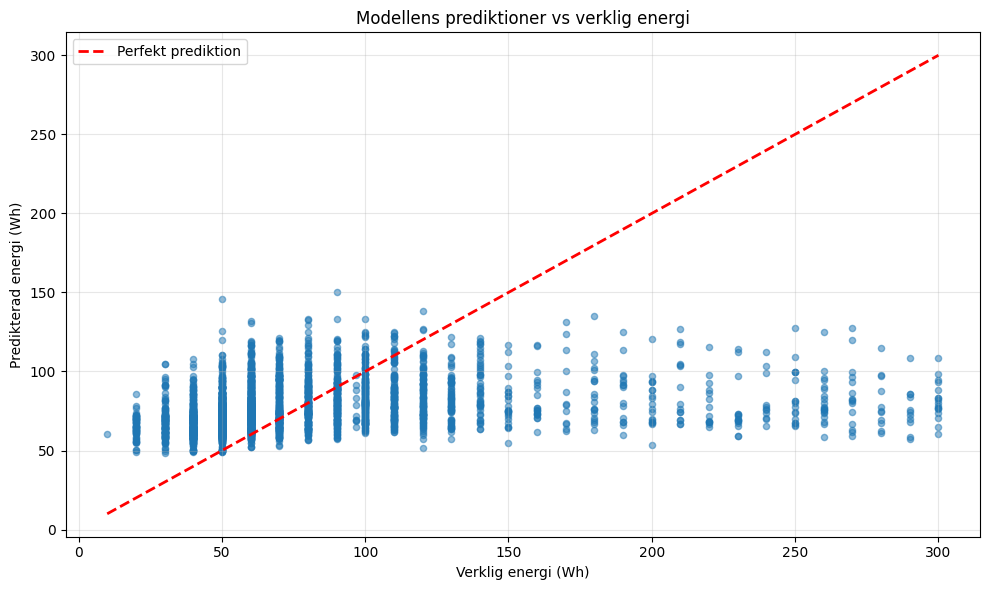

 Tolkning:
   • Prickar nära röd linje = bra prediktioner
   • Spridda prickar = modellen har svårt att förutsäga


In [8]:
# STEG 8: Visualisera resultat

print("\n GRAF: VERKLIG VS PREDIKTERAD")
print("=" * 60)

# Graf 1: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, s=20)
plt.plot([Y_test.min(), Y_test.max()], 
         [Y_test.min(), Y_test.max()], 
         'r--', linewidth=2, label='Perfekt prediktion')
plt.xlabel('Verklig energi (Wh)')
plt.ylabel('Predikterad energi (Wh)')
plt.title('Modellens prediktioner vs verklig energi')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(" Tolkning:")
print("   • Prickar nära röd linje = bra prediktioner")
print("   • Spridda prickar = modellen har svårt att förutsäga")

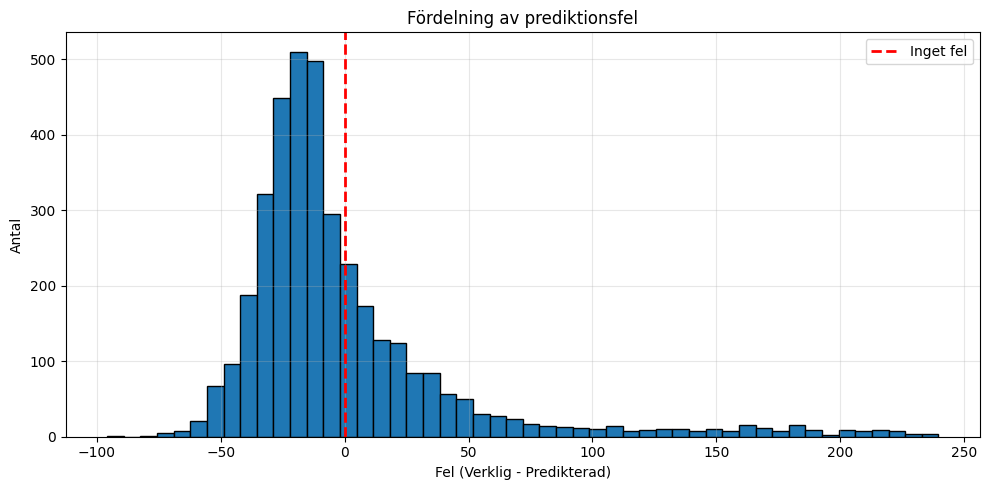


📊 Felstatistik:
   Medel fel: -0.2 Wh
   Standardavvikelse: 46.2 Wh
   Min fel: -95.9 Wh
   Max fel: 239.7 Wh


In [9]:
# Graf 2: Histogram av fel
fel = Y_test - Y_pred

plt.figure(figsize=(10, 5))
plt.hist(fel, bins=50, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Inget fel')
plt.xlabel('Fel (Verklig - Predikterad)')
plt.ylabel('Antal')
plt.title('Fördelning av prediktionsfel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Felstatistik:")
print(f"   Medel fel: {fel.mean():.1f} Wh")
print(f"   Standardavvikelse: {fel.std():.1f} Wh")
print(f"   Min fel: {fel.min():.1f} Wh")
print(f"   Max fel: {fel.max():.1f} Wh")

### STEG 9: Använd modellen för nya prediktioner

Nu kan vi förutsäga energi för **nya** situationer!

In [10]:
# STEG 9: Gör en ny prediktion

print("\n🔮 GÖR EN NY PREDIKTION")
print("=" * 60)

# Exempel: Vad händer om...
ny_situation = pd.DataFrame({
    'Temp_Kök_C': [25.0],           # Varmt i köket
    'Fukt_Kök_Procent': [50.0],     # Normal fuktighet
    'Belysning_Wh': [40.0],         # Lampor på (aktivitet)
    'Temp_Utomhus_Norr_C': [5.0]    # Kallt ute
})

print("📋 NY SITUATION:")
print(f"   Temp i kök: 25.0°C")
print(f"   Fuktighet: 50.0%")
print(f"   Belysning: 40.0 Wh")
print(f"   Temp ute: 5.0°C")

# Gör prediktion
prediktion = modell.predict(ny_situation)

print(f"\n✨ MODELLENS PREDIKTION:")
print(f"   Förväntad energi: {prediktion[0]:.0f} Wh")

# Jämför med typiskt värde
print(f"\n💡 JÄMFÖRELSE:")
print(f"   Genomsnitt i data: {Y.mean():.0f} Wh")
if prediktion[0] > Y.mean():
    print(f"   → Högre än normalt (+{prediktion[0] - Y.mean():.0f} Wh)")
else:
    print(f"   → Lägre än normalt ({prediktion[0] - Y.mean():.0f} Wh)")


🔮 GÖR EN NY PREDIKTION
📋 NY SITUATION:
   Temp i kök: 25.0°C
   Fuktighet: 50.0%
   Belysning: 40.0 Wh
   Temp ute: 5.0°C

✨ MODELLENS PREDIKTION:
   Förväntad energi: 128 Wh

💡 JÄMFÖRELSE:
   Genomsnitt i data: 77 Wh
   → Högre än normalt (+51 Wh)


### SAMMANFATTNING

## ✅ Vad vi har gjort:

1. **Förberedt data** → Valt 4 features för att förutsäga energi
2. **Byggt modell** → Linear Regression (superenkelt!)
3. **Tränat** → Modellen lärde sig från 80% av datan
4. **Testat** → Utvärderat på 20% ny data
5. **Utvärderat** → MAE och R² score
6. **Visualiserat** → Grafer för att förstå resultat
7. **Använt** → Gjort prediktioner på nya situationer

## 🎯 Business-värde:

- **Förutsäga** framtida energibehov
- **Optimera** energianvändning
- **Upptäcka** avvikelser (om verklig >> predikterad → defekt apparat?)

## 📚 Nästa steg (frivilligt):

1. Lägg till fler features (fler rum, väderdata)
2. Testa andra modeller (Random Forest, XGBoost)
3. Optimera hyperparametrar
4. Bygg prediktion per timme på dygnet

In [ ]:
print("\n" + "="*60)
print("🎉 LAB 4 KLAR! Du har byggt din första ML-modell! 🚀")
print("="*60)